In [1]:
import numpy as np
import pandas as pd
import os
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.stats as stats

np.random.seed(97)

In [2]:
m = ["A", "C", "G", "T"]
def id2seq(ids):
    return "".join([m[i] for i in ids])

In [3]:
expression_percentile_thres = 90
ensemble_predictions_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/ensemble_predictions/"

In [4]:
os.listdir(ensemble_predictions_dir)

['filtered_ensemble_1_predictions.parquet',
 'dataset_seqs_eval_2.pkl',
 'filtered_coms_sequences_ensemble_2_6mer_counts_pairwise_euclidean_distances.npy',
 'filtered_coms_sequences_ensemble_4.parquet',
 'den_seqs_eval_4.pkl',
 'dataset_seqs_eval_3.pkl',
 'all_ensemble_2_predictions.parquet',
 'sequences_from_batch_1_expression_spectrum_eval_4.pkl',
 'filtered_coms_sequences_ensemble_1_6mer_counts.npy',
 'filtered_coms_sequences_ensemble_2_6mer_counts.npy',
 'filtered_dens_sequences_ensemble_4.parquet',
 'filtered_ensemble_4_predictions.parquet',
 'den_seqs_v14_eval_3.pkl',
 'all_ensemble_predictions.parquet',
 'filtered_ensemble_2_predictions.parquet',
 'filtered_dens_sequences_ensemble_1.parquet',
 'dataset_seqs_eval.pkl',
 'filtered_ensemble_3_predictions.parquet',
 'filtered_dens_sequences_ensemble_3.parquet',
 'all_ensemble_1_predictions.parquet',
 'coms_seqs_eval_3.pkl',
 'all_ensemble_4_predictions.parquet',
 'filtered_ensemble_3_predictions_DENs_v14.parquet',
 'sequences_from_b

In [5]:
dataset_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "dataset_seqs_eval_4.pkl"), "rb"))
sequences_from_batch_1_expression_spectrum = pickle.load(open(os.path.join(ensemble_predictions_dir, "sequences_from_batch_1_expression_spectrum_eval_4.pkl"), "rb"))
sequences_generated_using_DE_motifs = pickle.load(open(os.path.join(ensemble_predictions_dir, "sequences_generated_using_DE_motifs_eval_4.pkl"), "rb"))
coms_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "coms_seqs_eval_4.pkl"), "rb"))
dens_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "den_seqs_v14_eval_4.pkl"), "rb"))

In [6]:
# process COMs sequences
coms_df = {}
coms_df["design_method"] = []
coms_df["designed_for"] = []
coms_df["original_sequence"] = []
coms_df["sequence"] = []
coms_df["provenance"] = []
coms_df["coms_alpha"] = []
coms_df["diversity_loss_coef"] = []
coms_df["entropy_loss_coef"] = []
coms_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    coms_df[cell + "_ensemble_mean"] = []
    coms_df[cell + "_ensemble_std"] = []
    coms_df[cell + "_all_ensemble_preds"] = []
    coms_df[cell + "_design_model"] = []
    coms_df[cell + "_measured"] = []

ori_sequences = [id2seq(i) for i in coms_sequences["original_seq"]]

for cell in ["jurkat", "k562", "thp1"]:
    print(cell)
    sequences = [id2seq(i) for i in coms_sequences[f"{cell}_optimized_seq"]]
    
    corrected_cell_name = cell.upper()
    if cell == "jurkat":
        corrected_cell_name = "Jurkat"
    
    coms_df["designed_for"] += [corrected_cell_name for i in range(len(sequences))]
    coms_df["original_sequence"] += ori_sequences.copy()
    coms_df["sequence"] += ["".join(i) for i in sequences]
    coms_df["coms_alpha"] += list(coms_sequences["coms_loss_weight"])
    coms_df["provenance"] += [None for i in sequences]
    coms_df["diversity_loss_coef"] += [None for i in sequences]
    coms_df["entropy_loss_coef"] += [None for i in sequences]
    coms_df["base_entropy_loss_coef"] += [None for i in sequences]
    coms_df["design_method"] += ["COMs" for i in sequences]
    
    for cell2 in ["Jurkat", "K562", "THP1"]:
        coms_df[cell2 + "_ensemble_mean"] += list(coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"].mean(axis=0))
        coms_df[cell2 + "_ensemble_std"] += list(coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"].std(axis=0))
        coms_df[cell2 + "_all_ensemble_preds"] += [coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"]]
        coms_df[cell2 + "_design_model"] += list(coms_sequences[f"{cell}_opt_seq_{cell2.lower()}_pred"])
        coms_df[cell2 + "_measured"] += [None for i in sequences]

cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    coms_df[cell2 + "_all_ensemble_preds"] = np.hstack(coms_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = coms_df[cell2 + "_all_ensemble_preds"].copy()
    coms_df.pop(cell2 + "_all_ensemble_preds")

coms_df = pd.DataFrame(coms_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    coms_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(coms_df.shape[0])]
    
coms_df

jurkat
k562
thp1


design_method designed_for  \
0               COMs       Jurkat   
1               COMs       Jurkat   
2               COMs       Jurkat   
3               COMs       Jurkat   
4               COMs       Jurkat   
...              ...          ...   
306427          COMs         THP1   
306428          COMs         THP1   
306429          COMs         THP1   
306430          COMs         THP1   
306431          COMs         THP1   

                                        original_sequence  \
0       GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...   
1       ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...   
2       CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...   
3       AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...   
4       ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...   
...                                                   ...   
306427  TACCTTATTCTTTAATGATTGCTTGTCACCATACGGATGAATCAGA...   
306428  CCAACACCCTACCTTTCTCTCTCTGGACCCACTTCCTCTTGCTGCC...   
306429  TGGTTTTTGCAGTCACACAGCTTTCCGAGACCCTCGTCCAGAGCAG...   
306430  GAAGGGCAGACAGCTGCCAGATACTTGCACCCCATTCCCTGGGGCC...   
306431  GAAGGGGTGGGGAGGGGAGAGAGTCCCTTTCAGTGCCCAAGCCTGT...   

                                                 sequence provenance  \
0       TCGAATAGTCCTATAAGCTCGTAAACTCCTACGCCACTATTCAGTA...       None   
1       TCAGGTGGGGGGGGGGCTTCGCGAGGCGCGCTGTCGTAAAATCGGC...       None   
2       CGTGATGTCATTCCGTGGGGAATCATTATGTATCAATAGGTATGCC...       None   
3       ATGGTGAGAATTCATTAGTTAGTAAATAATGAGGGCGGGGGCGTGA...       None   
4       AATGGCACGCGTAAACGGCATGTAAAGCCATAGAGCAGGTAAGGCG...       None   
...                                                   ...        ...   
306427  ATCCACGTTCAGGATTGATTCCACGTCACTTCCGTATTGAAAAGCA...       None   
306428  GCAGCTCACTTCCGTCATCCTTCTTCGGCTACTTCCGCAGAAGTCC...       None   
306429  AGGGCTGTTGAGCAAAGAGGATAGCCGGGTCTCTGGTAGGCAGTAT...       None   
306430  TCTGGTCTGGCAGCTGGTAGCAATTTGAGCGGCTTTCTCTTTGCCT...       None   
306431  CCCAAGGAAAAAAAAAAGCCAACTCCTGCGCAGGTCCTTGTCCTGT...       None   

        coms_alpha diversity_loss_coef entropy_loss_coef  \
0             0.00                None              None   
1             0.00                None              None   
2             0.00                None              None   
3             0.00                None              None   
4             0.00                None              None   
...            ...                 ...               ...   
306427        0.03                None              None   
306428        0.03                None              None   
306429        0.03                None              None   
306430        0.03                None              None   
306431        0.03                None              None   

       base_entropy_loss_coef  Jurkat_ensemble_mean  ...  K562_ensemble_std  \
0                        None              1.424300  ...           0.307729   
1                        None              1.804220  ...           0.320410   
2                        None              2.288362  ...           0.292209   
3                        None              0.813155  ...           0.179015   
4                        None              1.324752  ...           0.232928   
...                       ...                   ...  ...                ...   
306427                   None             -0.252594  ...           0.149066   
306428                   None              0.291112  ...           0.242282   
306429                   None             -0.364002  ...           0.154262   
306430                   None             -0.509244  ...           0.124745   
306431                   None             -0.563969  ...           0.108755   

        K562_design_model K562_measured  THP1_ensemble_mean  \
0                0.804079          None            0.334840   
1                1.947420          None            0.524022   
2                1.120590          None            0.833220   
3                0.617886          None   

In [7]:
# process DENs sequences
dens_df = {}
dens_df["design_method"] = []
dens_df["designed_for"] = []
dens_df["original_sequence"] = []
dens_df["sequence"] = []
dens_df["coms_alpha"] = []
dens_df["provenance"] = []
dens_df["diversity_loss_coef"] = []
dens_df["entropy_loss_coef"] = []
dens_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    dens_df[cell + "_ensemble_mean"] = []
    dens_df[cell + "_ensemble_std"] = []
    dens_df[cell + "_all_ensemble_preds"] = []
    dens_df[cell + "_design_model"] = []
    dens_df[cell + "_measured"] = []
    
dens_df["designed_for"] += list(dens_sequences["designed_for"])
dens_df["design_method"] += ["DENs" for i in dens_sequences["sequence"]]
dens_df["original_sequence"] += [None for i in dens_sequences["sequence"]]

dens_df["sequence"] += [id2seq(i) for i in dens_sequences["sequence"]]

dens_df["provenance"] += [None for i in dens_sequences["sequence"]]
dens_df["coms_alpha"] += [float(i.split("_")[1]) for i in dens_sequences["design_model"]]
dens_df["diversity_loss_coef"] += list(dens_sequences["diversity_loss_coef"])
dens_df["entropy_loss_coef"] += list(dens_sequences["entropy_loss_coef"])
dens_df["base_entropy_loss_coef"] += list(dens_sequences["base_entropy_loss_coef"])

for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_ensemble_mean"] += list(dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    dens_df[cell2 + "_ensemble_std"] += list(dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    dens_df[cell2 + "_all_ensemble_preds"] += [dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"]]
    dens_df[cell2 + "_design_model"] += list(dens_sequences[f"{cell2}"])
    dens_df[cell2 + "_measured"] += [None for i in dens_sequences["designed_for"]]
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_all_ensemble_preds"] = np.hstack(dens_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = dens_df[cell2 + "_all_ensemble_preds"].copy()
    dens_df.pop(cell2 + "_all_ensemble_preds")

dens_df = pd.DataFrame(dens_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(dens_df.shape[0])]
    
dens_df

design_method designed_for original_sequence  \
0               DENs         THP1              None   
1               DENs         THP1              None   
2               DENs         THP1              None   
3               DENs         THP1              None   
4               DENs         THP1              None   
...              ...          ...               ...   
125688          DENs         K562              None   
125689          DENs         K562              None   
125690          DENs         K562              None   
125691          DENs         K562              None   
125692          DENs         K562              None   

                                                 sequence  coms_alpha  \
0       GCCGCCGCAGCAACGGAAGCGGAGGCGGAGACCGAAACACGAAGTT...      0.0003   
1       GCCGCCGCCGCAACGGAAGCGGAGGCGGAGACCGAAACACGAAGTT...      0.0003   
2       GCCGCCGCCGCAACGGAAGCGGAGGCGGAGACCGAAACACGAAGTT...      0.0003   
3       GCCGCCGCCGCAACGGAAGCGGAGGCGGAGACCGAAACACGAAGTT...      0.0003   
4       GCCGCCGCAGCAACGGAAGCGGAGGCGGAGACCGAAACACGAAGTT...      0.0003   
...                                                   ...         ...   
125688  CCGGGAGGATTTCCGGTGCATCTACCGGGAGCTCCGCTTTTTTTTT...      0.0000   
125689  TTTTTTTTTTTTTAAAAATAAAAAAAAAAAGAGCTGCACCTCCGCA...      0.0000   
125690  AGCGAATCGATCTCACCGGAGATCCATTCTTTTTTTTTTTTTTTTT...      0.0000   
125691  TTTTTTTTTTTTTATATAATAAAATCAAGATCGGAATCCCCGAATC...      0.0000   
125692  CGGCTGCTCTTTTTTTTTTTTTATAATAAATATATAAAAAATAGAA...      0.0000   

       provenance  diversity_loss_coef  entropy_loss_coef  \
0            None                  1.0                1.0   
1            None                  1.0                1.0   
2            None                  1.0                1.0   
3            None                  1.0                1.0   
4            None                  1.0                1.0   
...           ...                  ...                ...   
125688       None                 10.0                1.0   
125689       None                 10.0                1.0   
125690       None                 10.0                1.0   
125691       None                 10.0                1.0   
125692       None                 10.0                1.0   

        base_entropy_loss_coef  Jurkat_ensemble_mean  ...  K562_ensemble_std  \
0                          5.0              0.064939  ...           0.398118   
1                          5.0              0.783270  ...           0.530343   
2                          5.0              0.530261  ...           0.481333   
3                          5.0              0.724507  ...           0.533225   
4                          5.0             -0.008677  ...           0.336234   
...                        ...                   ...  ...                ...   
125688                    10.0              1.765693  ...           0.340388   
125689                    10.0              0.974452  ...           0.281057   
125690                    10.0              2.173667  ...           0.658556   
125691                    10.0              1.661963  ...           0.384229   
125692                    10.0              1.126189  ...           0.465281   

        K562_design_model K562_measured  THP1_ensemble_mean  \
0                1.035136          None            0.710532   
1                1.600702          None            1.324038   
2                1.298906          None            1.078072   
3                1.573599          None            1.249540   
4                0.865217          None            0.647494   
...                   ...           ...                 ...   
125688           3.528538          None            1.483416   
125689           2.984899          None            0.847849   
125690           3.693174          None            2.050751   
125691           3.507952          None            1.445916   
125692           3.481485          None            1.262279   

        THP1_ensem

In [8]:
# process original dataset sequences
dataset_df = {}
dataset_df["design_method"] = []
dataset_df["designed_for"] = []
dataset_df["original_sequence"] = []
dataset_df["sequence"] = []
dataset_df["coms_alpha"] = []
dataset_df["provenance"] = []
dataset_df["diversity_loss_coef"] = []
dataset_df["entropy_loss_coef"] = []
dataset_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    dataset_df[cell + "_ensemble_mean"] = []
    dataset_df[cell + "_ensemble_std"] = []
    dataset_df[cell + "_all_ensemble_preds"] = []
    dataset_df[cell + "_design_model"] = []
    dataset_df[cell + "_measured"] = []

dataset_df["designed_for"] += [None for i in dataset_sequences["sequences"]]
dataset_df["design_method"] += ["Dataset" for i in dataset_sequences["sequences"]]
dataset_df["original_sequence"] += [None for i in dataset_sequences["sequences"]]

dataset_df["sequence"] += [id2seq(i) for i in dataset_sequences["sequences"]]

dataset_df["provenance"] += [None for i in dataset_sequences["sequences"]]
dataset_df["coms_alpha"] += [None for i in dataset_sequences["sequences"]]
dataset_df["diversity_loss_coef"] += [None for i in dataset_sequences["sequences"]]
dataset_df["entropy_loss_coef"] += [None for i in dataset_sequences["sequences"]]
dataset_df["base_entropy_loss_coef"] += [None for i in dataset_sequences["sequences"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_ensemble_mean"] += list(dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"].mean(axis=0))
    dataset_df[cell2 + "_ensemble_std"] += list(dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"].std(axis=0))
    dataset_df[cell2 + "_all_ensemble_preds"] += [dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"]]
    dataset_df[cell2 + "_design_model"] += [None for i in dataset_sequences["sequences"]]
    dataset_df[cell2 + "_measured"] += list(dataset_sequences[f"{cell2.lower()}_output"])
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_all_ensemble_preds"] = np.hstack(dataset_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = dataset_df[cell2 + "_all_ensemble_preds"].copy()
    dataset_df.pop(cell2 + "_all_ensemble_preds")

dataset_df = pd.DataFrame(dataset_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(dataset_df.shape[0])]
    
dataset_df

design_method designed_for original_sequence  \
0           Dataset         None              None   
1           Dataset         None              None   
2           Dataset         None              None   
3           Dataset         None              None   
4           Dataset         None              None   
...             ...          ...               ...   
17099       Dataset         None              None   
17100       Dataset         None              None   
17101       Dataset         None              None   
17102       Dataset         None              None   
17103       Dataset         None              None   

                                                sequence coms_alpha  \
0      GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...       None   
1      ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...       None   
2      CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...       None   
3      AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...       None   
4      ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...       None   
...                                                  ...        ...   
17099  ATGTGGGCCATTTACTGTCACTCATCTGTTGGTCATTTTACTTCCT...       None   
17100  GAATGTATGTACATTTGTTCCTGAGATACAGGTTGATGGACGGATG...       None   
17101  CTGGGGCTGGGCAGAGGGCAGGGAGGGGAAGGGTCCTGACCTCTGA...       None   
17102  CCTTCCAAATCCTCCTCCTAGAAGCCCTCCTTGGTTGGCCCTGCCT...       None   
17103  CCCCAAGATTAACCAGTTCTGTCCTGTCAGCAGGAGCAGGCAACTA...       None   

      provenance diversity_loss_coef entropy_loss_coef base_entropy_loss_coef  \
0           None                None              None                   None   
1           None                None              None                   None   
2           None                None              None                   None   
3           None                None              None                   None   
4           None                None              None                   None   
...          ...                 ...               ...                    ...   
17099       None                None              None                   None   
17100       None                None              None                   None   
17101       None                None              None                   None   
17102       None                None              None                   None   
17103       None                None              None                   None   

       Jurkat_ensemble_mean  ...  K562_ensemble_std K562_design_model  \
0                  1.883490  ...           0.366580              None   
1                  0.489078  ...           0.178652              None   
2                  0.582584  ...           0.150918              None   
3                  1.648947  ...           0.434763              None   
4                 -0.434106  ...           0.091951              None   
...                     ...  ...                ...               ...   
17099             -0.157472  ...           0.107173              None   
17100             -0.562212  ...           0.112817              None   
17101             -0.684803  ...           0.106112              None   
17102             -0.406869  ...           0.089910              None   
17103              0.057438  ...           0.390189              None   

       K562_measured  THP1_ensemble_mean  THP1_ensemble_std THP1_design_model  \
0           2.849015            0.801432           0.284502              None   
1           0.141496            0.015464           0.082955              None   
2           0.849015           -0.012126           0.096362              None   
3           1.433977            0.959486           0.339409              None   
4          -0.943467           -0.173523           0.077020              None   
...              ...                 ...                ...               ...   
17099      -0.528565            0.036575           0.076518              None   
17100 

In [9]:
# process sequences from full spectrum of batch 1 expression
sequences_from_batch_1_expression_spectrum_df = {}
sequences_from_batch_1_expression_spectrum_df["design_method"] = []
sequences_from_batch_1_expression_spectrum_df["designed_for"] = []
sequences_from_batch_1_expression_spectrum_df["original_sequence"] = []
sequences_from_batch_1_expression_spectrum_df["sequence"] = []
sequences_from_batch_1_expression_spectrum_df["provenance"] = []
sequences_from_batch_1_expression_spectrum_df["coms_alpha"] = []
sequences_from_batch_1_expression_spectrum_df["diversity_loss_coef"] = []
sequences_from_batch_1_expression_spectrum_df["entropy_loss_coef"] = []
sequences_from_batch_1_expression_spectrum_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    sequences_from_batch_1_expression_spectrum_df[cell + "_ensemble_mean"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_ensemble_std"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_all_ensemble_preds"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_design_model"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_measured"] = []

sequences_from_batch_1_expression_spectrum_df["designed_for"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["design_method"] += ["batchI_expression_spectrum" for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["original_sequence"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]

sequences_from_batch_1_expression_spectrum_df["sequence"] += [id2seq(i) for i in sequences_from_batch_1_expression_spectrum["sequence"]]

sequences_from_batch_1_expression_spectrum_df["provenance"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["coms_alpha"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["diversity_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["entropy_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["base_entropy_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_ensemble_mean"] += list(sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_ensemble_std"] += list(sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] += [sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"]]
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_design_model"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_measured"] += list(sequences_from_batch_1_expression_spectrum[f"{cell2}"])
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] = np.hstack(sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"].copy()
    sequences_from_batch_1_expression_spectrum_df.pop(cell2 + "_all_ensemble_preds")

sequences_from_batch_1_expression_spectrum_df = pd.DataFrame(sequences_from_batch_1_expression_spectrum_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(sequences_from_batch_1_expression_spectrum_df.shape[0])]
    
sequences_from_batch_1_expression_spectrum_df

design_method designed_for original_sequence  \
0    batchI_expression_spectrum         None              None   
1    batchI_expression_spectrum         None              None   
2    batchI_expression_spectrum         None              None   
3    batchI_expression_spectrum         None              None   
4    batchI_expression_spectrum         None              None   
..                          ...          ...               ...   
936  batchI_expression_spectrum         None              None   
937  batchI_expression_spectrum         None              None   
938  batchI_expression_spectrum         None              None   
939  batchI_expression_spectrum         None              None   
940  batchI_expression_spectrum         None              None   

                                              sequence provenance coms_alpha  \
0    CTGGGCTTGGAGGGCTCTAGGACCCAGCAACCTGCGCAGGGTGAAG...       None       None   
1    TCCTTTCATTTTGAGAAGAAGGAGGGAGGGGAGGGGGGACTTGGGG...       None       None   
2    CGAGCCCGGCTCGCCGAGGCCTCCCCACGCCCCCGCGGGGGTGGAG...       None       None   
3    AGGAGGAGAGGAGGCAGCGCCCGGCCAGGCTGGGAGCACCTACGGC...       None       None   
4    GGGCGCCTGAGGGTCCCGGCCACCCGAGAAGGGGGCTTCTTAATCG...       None       None   
..                                                 ...        ...        ...   
936  AGCTTTATAGGAATGCTGTTGCTTTAAATCCGAAATCCCGTGCCGG...       None       None   
937  AAACTCAGCGTGGGGTGGTGGGTTTCCCCGTCTTCTGGGAGACCCG...       None       None   
938  GCGCGGGGCCAATCAGCGTGCGCCGTTCCGAAAGTTGCCTTTTATG...       None       None   
939  GTGCGTCGGCTTCCGTACAACACGGATACTCTCTCTCTGACGCAAC...       None       None   
940  GCAAGTGGGCAGTGAGTGTGCCACGGACTGGCCTGGGCTGTGGCCT...       None       None   

    diversity_loss_coef entropy_loss_coef base_entropy_loss_coef  \
0                  None              None                   None   
1                  None              None                   None   
2                  None              None                   None   
3                  None              None                   None   
4                  None              None                   None   
..                  ...               ...                    ...   
936                None              None                   None   
937                None              None                   None   
938                None              None                   None   
939                None              None                   None   
940                None              None                   None   

     Jurkat_ensemble_mean  ...  K562_ensemble_std K562_design_model  \
0                0.248998  ...           0.122026              None   
1               -0.465769  ...           0.110569              None   
2               -0.408776  ...           0.107753              None   
3               -0.041670  ...           0.131846              None   
4                0.285311  ...           0.164006              None   
..                    ...  ...                ...               ...   
936              4.252730  ...           0.589376              None   
937             -0.360493  ...           0.115513              None   
938              2.427932  ...           1.157925              None   
939              3.830371  ...           0.614395              None   
940             -0.504501  ...           0.078932              None   

     K562_measured  THP1_ensemble_mean  THP1_ensemble_std THP1_design_model  \
0         0.821810            0.020575           0.065364              None   
1        -2.993798           -0.251454           0.113811              None   
2        -3.788144           -0.130416           0.081715              None   
3         1.487552            0.097624           0.078970              None   
4        -3.549167            0.079867           0.094386              None   
..             ...                 ...                ...               ...   
936       5.882017            4.077425   

In [10]:
# process sequences from full spectrum of batch 1 expression
sequences_generated_using_DE_motifs_df = {}
sequences_generated_using_DE_motifs_df["design_method"] = []
sequences_generated_using_DE_motifs_df["designed_for"] = []
sequences_generated_using_DE_motifs_df["original_sequence"] = []
sequences_generated_using_DE_motifs_df["sequence"] = []
sequences_generated_using_DE_motifs_df["provenance"] = []
sequences_generated_using_DE_motifs_df["coms_alpha"] = []
sequences_generated_using_DE_motifs_df["diversity_loss_coef"] = []
sequences_generated_using_DE_motifs_df["entropy_loss_coef"] = []
sequences_generated_using_DE_motifs_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    sequences_generated_using_DE_motifs_df[cell + "_ensemble_mean"] = []
    sequences_generated_using_DE_motifs_df[cell + "_ensemble_std"] = []
    sequences_generated_using_DE_motifs_df[cell + "_all_ensemble_preds"] = []
    sequences_generated_using_DE_motifs_df[cell + "_design_model"] = []
    sequences_generated_using_DE_motifs_df[cell + "_measured"] = []

sequences_generated_using_DE_motifs_df["designed_for"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["design_method"] += ["generated_using_DE_motifs" for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["original_sequence"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]

sequences_generated_using_DE_motifs_df["sequence"] += [id2seq(i) for i in sequences_generated_using_DE_motifs["sequence"]]

sequences_generated_using_DE_motifs_df["provenance"] += list(sequences_generated_using_DE_motifs["provenance"])
sequences_generated_using_DE_motifs_df["coms_alpha"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["diversity_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["entropy_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["base_entropy_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_ensemble_mean"] += list(sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    sequences_generated_using_DE_motifs_df[cell2 + "_ensemble_std"] += list(sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] += [sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"]]
    sequences_generated_using_DE_motifs_df[cell2 + "_design_model"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
    sequences_generated_using_DE_motifs_df[cell2 + "_measured"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] = np.hstack(sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"].copy()
    sequences_generated_using_DE_motifs_df.pop(cell2 + "_all_ensemble_preds")

sequences_generated_using_DE_motifs_df = pd.DataFrame(sequences_generated_using_DE_motifs_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(sequences_generated_using_DE_motifs_df.shape[0])]
    
sequences_generated_using_DE_motifs_df

design_method designed_for original_sequence  \
0     generated_using_DE_motifs         None              None   
1     generated_using_DE_motifs         None              None   
2     generated_using_DE_motifs         None              None   
3     generated_using_DE_motifs         None              None   
4     generated_using_DE_motifs         None              None   
...                         ...          ...               ...   
1557  generated_using_DE_motifs         None              None   
1558  generated_using_DE_motifs         None              None   
1559  generated_using_DE_motifs         None              None   
1560  generated_using_DE_motifs         None              None   
1561  generated_using_DE_motifs         None              None   

                                               sequence  \
0     ACTGGCTGACTGCGCGTGCACGTGGGCCTGCGCTGAACGTGCACGA...   
1     CGGCGATCGCTTCCTCCTCGCTGCGAAAGGAGGGTCCCTCGCAGCA...   
2     AGGCGTTCCACGCGCTCACCTGAAGGTTCCCCATGCTCTCCTCTGC...   
3     TTCTGGGGGCACTACGATTCCCAGCTTCACGCGTGACTACAACTCC...   
4     GGGCACTGGGGGCGCCGGCGCCCGCTCCTCAGGCGCCGGCGCCTGT...   
...                                                 ...   
1557  GAAGATAAAGCCTTTTTTTTTGTCTCGGATGTCAGAAAGCCTCTCT...   
1558  GTGTGCTGCTTATTTCTTCCTACACCAGCTGTGTGTTACACTTCCT...   
1559  ACCCCCCTCCTCAATCTTCCTTGGCCCCCAACAAGCTATTCTTCTT...   
1560  CGTCCGGAAGCGAGTTTTCTTATTCTAGCTGCGCTCTTTTTTTCCT...   
1561  GGGTGGCACCAGTGAGGAAGTGACATGGGCTTTCTATTTCTTCCTG...   

                                             provenance coms_alpha  \
0     {'background_sequence': 'ACTGGCTGACTCGGCAGGGGG...       None   
1     {'background_sequence': 'CGGCGATCGCGCAGCCAATCC...       None   
2     {'background_sequence': 'AGGCGTTCCAGCCGGCCACTG...       None   
3     {'background_sequence': 'TTCTGGGGGCGTCCTGTCCGC...       None   
4     {'background_sequence': 'GGGCACTGGGCAGCCATTTTC...       None   
...                                                 ...        ...   
1557  {'background_sequence': 'GAAGATAAAGACACATGTACA...       None   
1558  {'background_sequence': 'GTGTGCTGCTCTGGACGAGGC...       None   
1559  {'background_sequence': 'ACCCCCCTCCCTCCCCGCCAG...       None   
1560  {'background_sequence': 'CGTCCGGAAGTCCGGGCGGAG...       None   
1561  {'background_sequence': 'GGGTGGCACCCACTCCAGAGA...       None   

     diversity_loss_coef entropy_loss_coef base_entropy_loss_coef  \
0                   None              None                   None   
1                   None              None                   None   
2                   None              None                   None   
3                   None              None                   None   
4                   None              None                   None   
...                  ...               ...                    ...   
1557                None              None                   None   
1558                None              None                   None   
1559                None              None                   None   
1560                None              None                   None   
1561                None              None                   None   

      Jurkat_ensemble_mean  ...  K562_ensemble_std K562_design_model  \
0                 2.519571  ...           0.250570              None   
1                 3.244064  ...           0.245374              None   
2                -0.491834  ...           0.090973              None   
3                 1.831806  ...           0.248402              None   
4                 0.776382  ...           0.212530              None   
...                    ...  ...                ...               ...   
1557              1.308168  ...           0.341128              None   
1558             -0.437462  ...           0.094097              None   
1559              3.266768  ...           0.441077              None   
1560              1.531278  ...           0.410450              None   
1561             -0.195765  ...           0.121304    

In [11]:
final_df = pd.concat([coms_df, 
                      dens_df, 
                      sequences_generated_using_DE_motifs_df,
                      dataset_df,
                      sequences_from_batch_1_expression_spectrum_df]).reset_index(drop=True)
final_df.to_parquet(os.path.join(ensemble_predictions_dir, "all_ensemble_4_predictions_DENs_v14.parquet"))
final_df

design_method designed_for  \
0                             COMs       Jurkat   
1                             COMs       Jurkat   
2                             COMs       Jurkat   
3                             COMs       Jurkat   
4                             COMs       Jurkat   
...                            ...          ...   
451727  batchI_expression_spectrum         None   
451728  batchI_expression_spectrum         None   
451729  batchI_expression_spectrum         None   
451730  batchI_expression_spectrum         None   
451731  batchI_expression_spectrum         None   

                                        original_sequence  \
0       GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...   
1       ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...   
2       CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...   
3       AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...   
4       ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...   
...                                                   ...   
451727                                               None   
451728                                               None   
451729                                               None   
451730                                               None   
451731                                               None   

                                                 sequence provenance  \
0       TCGAATAGTCCTATAAGCTCGTAAACTCCTACGCCACTATTCAGTA...       None   
1       TCAGGTGGGGGGGGGGCTTCGCGAGGCGCGCTGTCGTAAAATCGGC...       None   
2       CGTGATGTCATTCCGTGGGGAATCATTATGTATCAATAGGTATGCC...       None   
3       ATGGTGAGAATTCATTAGTTAGTAAATAATGAGGGCGGGGGCGTGA...       None   
4       AATGGCACGCGTAAACGGCATGTAAAGCCATAGAGCAGGTAAGGCG...       None   
...                                                   ...        ...   
451727  AGCTTTATAGGAATGCTGTTGCTTTAAATCCGAAATCCCGTGCCGG...       None   
451728  AAACTCAGCGTGGGGTGGTGGGTTTCCCCGTCTTCTGGGAGACCCG...       None   
451729  GCGCGGGGCCAATCAGCGTGCGCCGTTCCGAAAGTTGCCTTTTATG...       None   
451730  GTGCGTCGGCTTCCGTACAACACGGATACTCTCTCTCTGACGCAAC...       None   
451731  GCAAGTGGGCAGTGAGTGTGCCACGGACTGGCCTGGGCTGTGGCCT...       None   

       coms_alpha diversity_loss_coef entropy_loss_coef  \
0             0.0                None              None   
1             0.0                None              None   
2             0.0                None              None   
3             0.0                None              None   
4             0.0                None              None   
...           ...                 ...               ...   
451727       None                None              None   
451728       None                None              None   
451729       None                None              None   
451730       None                None              None   
451731       None                None              None   

       base_entropy_loss_coef  Jurkat_ensemble_mean  ...  K562_ensemble_std  \
0                        None              1.424300  ...           0.307729   
1                        None              1.804220  ...           0.320410   
2                        None              2.288362  ...           0.292209   
3                        None              0.813155  ...           0.179015   
4                        None              1.324752  ...           0.232928   
...                       ...                   ...  ...                ...   
451727                   None              4.252730  ...           0.589376   
451728                   None             -0.360493  ...           0.115513   
451729                   None              2.427932  ...           1.157925   
451730                   None              3.830371  ...           0.614395   
451731                   None             -0.504501  ...           0.078932   

       K562_design_model K562_measured  THP1_ensemble_mean  THP1_ensemble_std  \
0               0.804079          None            0.334840           0.

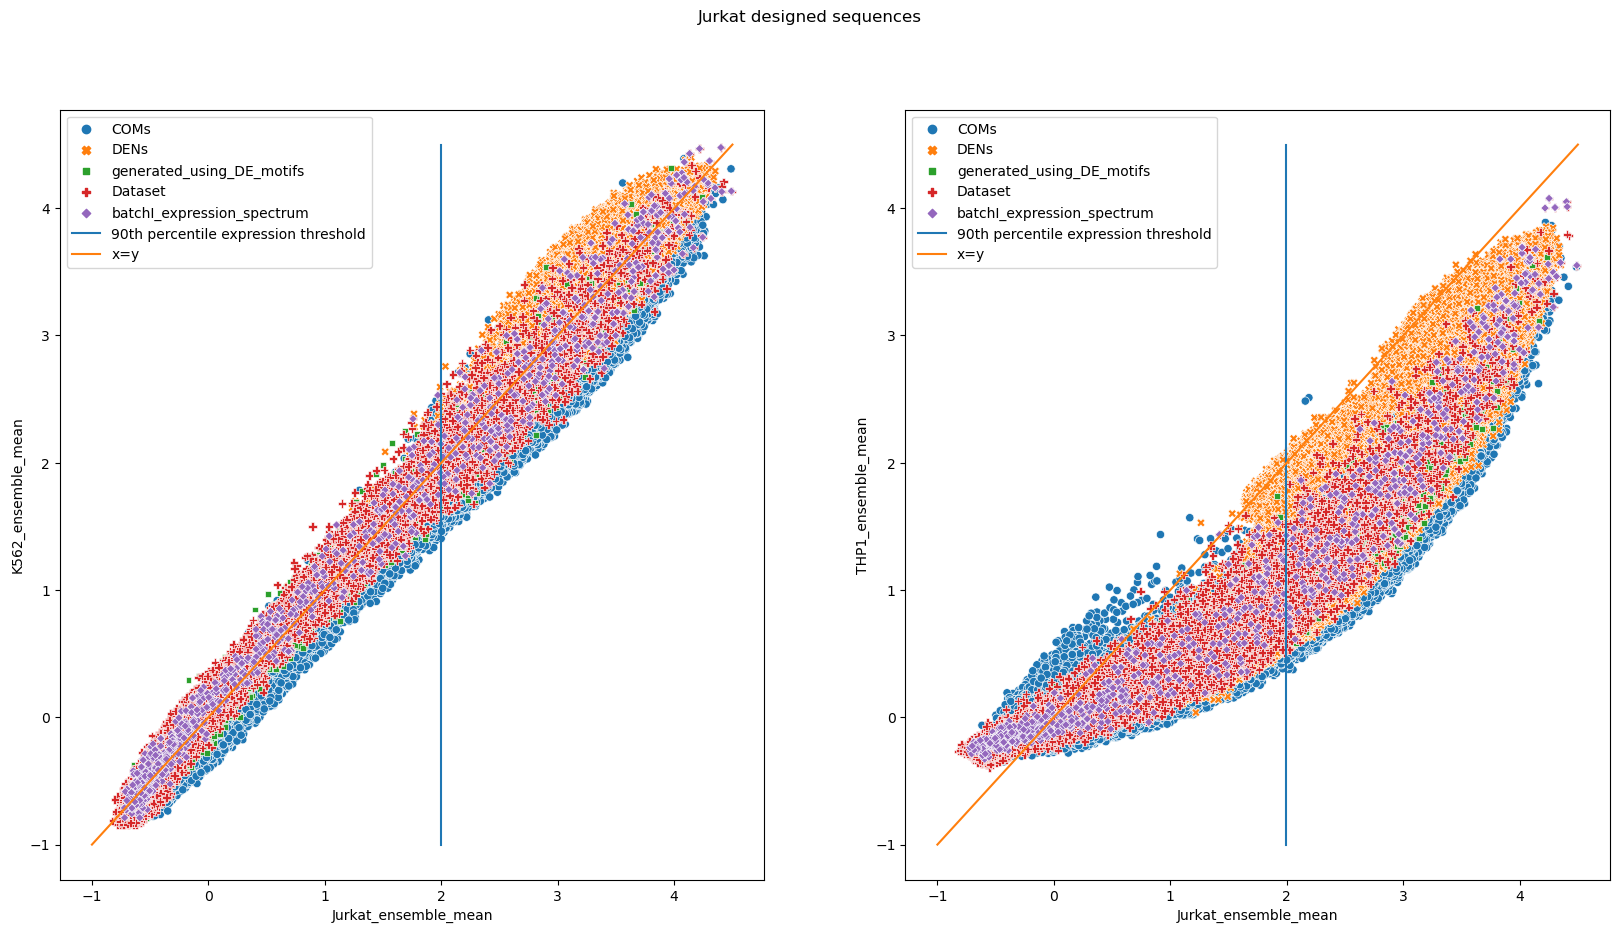

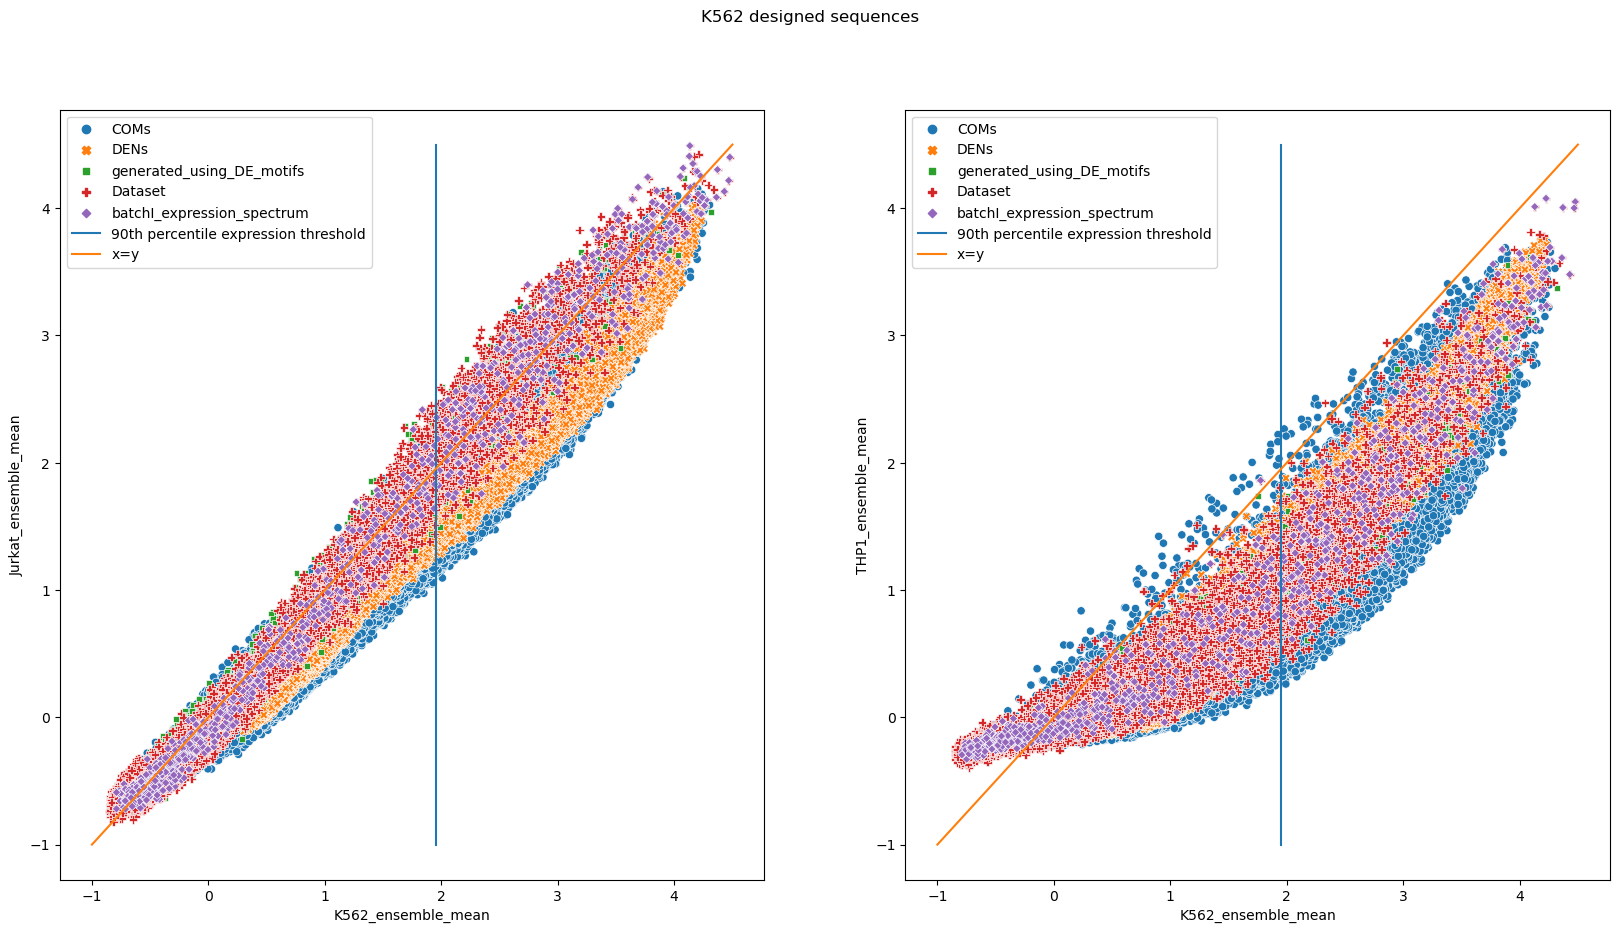

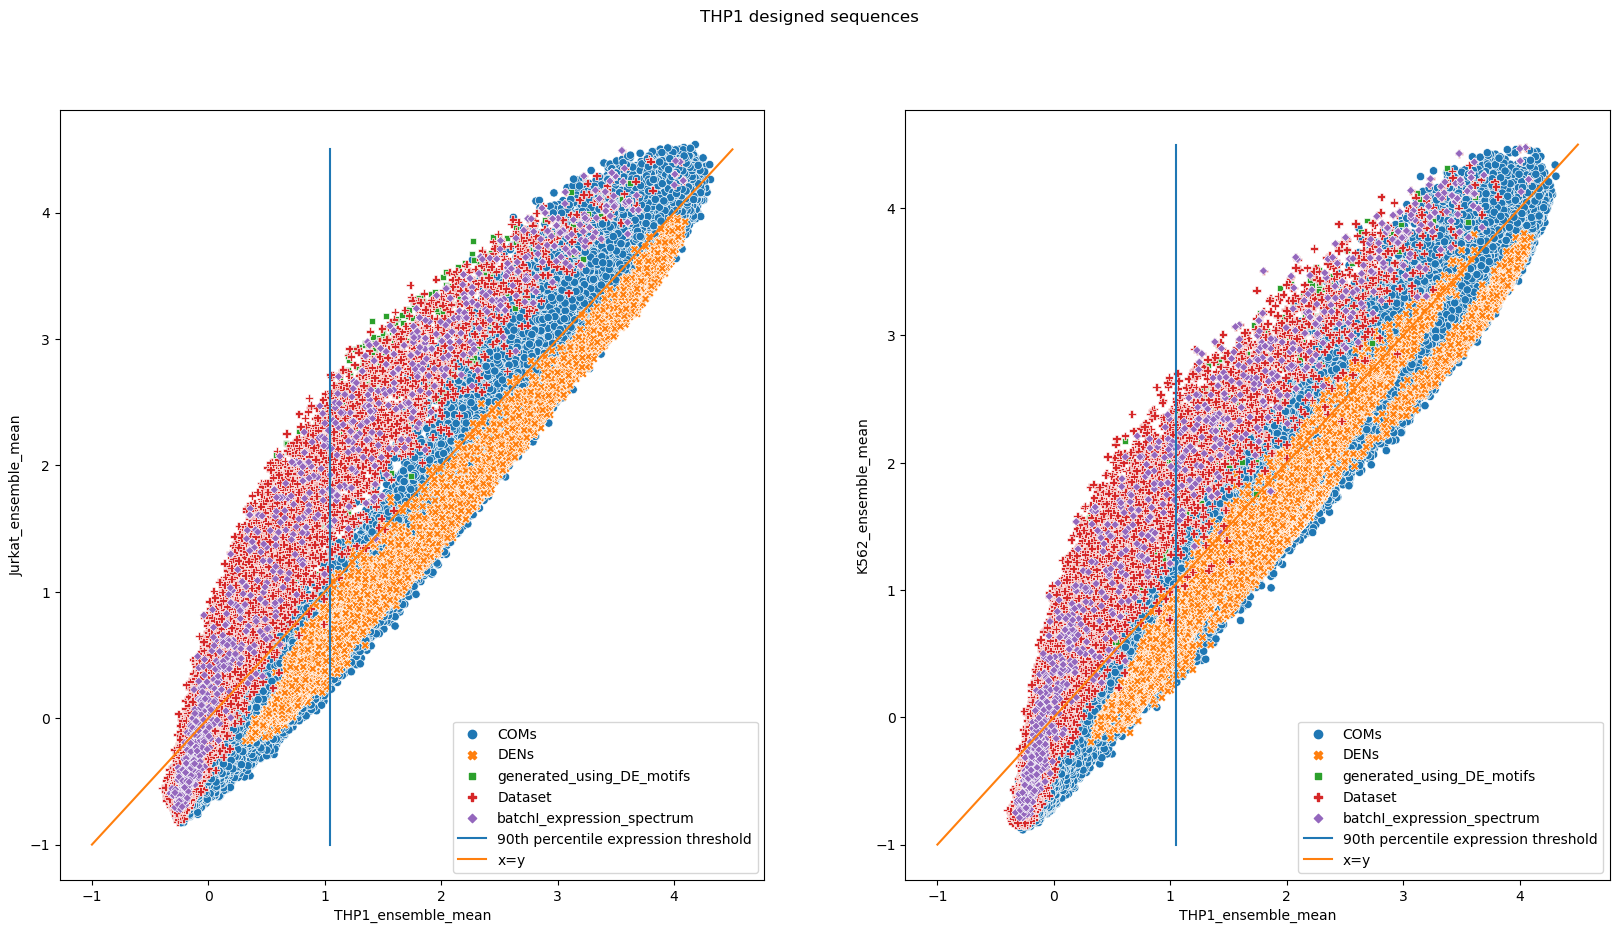

In [12]:
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    expression_percentile_thres_val = np.percentile(dataset_df[f"{cell1}_ensemble_mean"], expression_percentile_thres)
    
    subset_df = final_df[(final_df["designed_for"] == cell1) | (np.array(final_df["designed_for"]) == None)]
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    c = 0
    for j, cell2 in enumerate(["Jurkat", "K562", "THP1"]):
        if i == j:
            continue
        
        sns.scatterplot(data=subset_df, 
                        x=f"{cell1}_ensemble_mean", 
                        y=f"{cell2}_ensemble_mean", 
                        hue="design_method", style="design_method",
                        hue_order=["COMs", 
                                   "DENs", 
                                   "generated_using_DE_motifs", 
                                   "Dataset",
                                   "batchI_expression_spectrum"],
                        ax=ax[c])
        ax[c].plot(np.zeros(5) + expression_percentile_thres_val, np.linspace(-1, 4.5, 5), 
                   label=f"{expression_percentile_thres}th percentile expression threshold")
        ax[c].plot(np.linspace(-1, 4.5), np.linspace(-1, 4.5), label="x=y")
        ax[c].legend()
        c += 1
        
    fig.suptitle(f"{cell1} designed sequences")
    plt.show()

In [13]:
# filter sequences based on predicted expression and sort by differential expression
coms_df["filter_out"] = False
dens_df["filter_out"] = False
coms_df["diff_exp"] = 0.0
dens_df["diff_exp"] = 0.0
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    print(cell1)
    expression_percentile_thres_val = np.percentile(dataset_df[f"{cell1}_ensemble_mean"], expression_percentile_thres)
    print(f"Expression threshold = {expression_percentile_thres_val}")
    
    ori_COMs_num_seqs = (coms_df['designed_for'] == cell1).sum()
    ori_DENs_num_seqs = (dens_df['designed_for'] == cell1).sum()
    print(f"We had {ori_COMs_num_seqs} COMs designed sequences")
    print(f"We had {ori_DENs_num_seqs} DENs designed sequences")
    
    coms_df.loc[(coms_df["designed_for"] == cell1) & 
                (coms_df[f"{cell1}_ensemble_mean"] < expression_percentile_thres_val), "filter_out"] = True
    dens_df.loc[(dens_df["designed_for"] == cell1) & 
                (dens_df[f"{cell1}_ensemble_mean"] < expression_percentile_thres_val), "filter_out"] = True
    
    COMs_left_after_exp_thres = ((coms_df['designed_for'] == cell1) & ~coms_df['filter_out']).sum()
    DENs_left_after_exp_thres = ((dens_df['designed_for'] == cell1) & ~dens_df['filter_out']).sum()
    print(f"After filtering based on the expression threshold, we have {COMs_left_after_exp_thres} COMs designed sequences")
    print(f"After filtering based on the expression threshold, we have {DENs_left_after_exp_thres} DENs designed sequences")
    
    coms_df.loc[coms_df["designed_for"] == cell1, 
                "diff_exp"] = coms_df.loc[coms_df["designed_for"] == cell1, 
                                          f"{cell1}_ensemble_mean"]
    dens_df.loc[dens_df["designed_for"] == cell1, 
                "diff_exp"] = dens_df.loc[dens_df["designed_for"] == cell1, 
                                          f"{cell1}_ensemble_mean"]
    for j, cell2 in enumerate(["Jurkat", "K562", "THP1"]):
        if cell1 == cell2:
            continue
        coms_df.loc[(coms_df["designed_for"] == cell1) & 
                    (coms_df[f"{cell1}_ensemble_mean"] < coms_df[f"{cell2}_ensemble_mean"]), "filter_out"] = True
        dens_df.loc[(dens_df["designed_for"] == cell1) & 
                    (dens_df[f"{cell1}_ensemble_mean"] < dens_df[f"{cell2}_ensemble_mean"]), "filter_out"] = True
        
        coms_df.loc[coms_df["designed_for"] == cell1, 
                "diff_exp"] -= (coms_df.loc[coms_df["designed_for"] == cell1, 
                                          f"{cell2}_ensemble_mean"] * 0.5)
        dens_df.loc[dens_df["designed_for"] == cell1, 
                "diff_exp"] -= (dens_df.loc[dens_df["designed_for"] == cell1, 
                                          f"{cell2}_ensemble_mean"] * 0.5)
        
    COMs_left_after_DE_filt = ((coms_df['designed_for'] == cell1) & ~coms_df['filter_out']).sum()
    DENs_left_after_DE_filt = ((dens_df['designed_for'] == cell1) & ~dens_df['filter_out']).sum()
    print(f"After filtering based on the having non-zero DE, we have {COMs_left_after_DE_filt} COMs designed sequences")
    print(f"After filtering based on the having non-zero DE, we have {DENs_left_after_DE_filt} DENs designed sequences")

Jurkat
Expression threshold = 1.993691277503968
We had 102144 COMs designed sequences
We had 59752 DENs designed sequences
After filtering based on the expression threshold, we have 44965 COMs designed sequences
After filtering based on the expression threshold, we have 40435 DENs designed sequences
After filtering based on the having non-zero DE, we have 44079 COMs designed sequences
After filtering based on the having non-zero DE, we have 25450 DENs designed sequences
K562
Expression threshold = 1.9541875004768374
We had 102144 COMs designed sequences
We had 40229 DENs designed sequences
After filtering based on the expression threshold, we have 50434 COMs designed sequences
After filtering based on the expression threshold, we have 22630 DENs designed sequences
After filtering based on the having non-zero DE, we have 49399 COMs designed sequences
After filtering based on the having non-zero DE, we have 22609 DENs designed sequences
THP1
Expression threshold = 1.0461508750915527
We h

In [14]:
coms_df = coms_df[~coms_df["filter_out"]].sort_values(by="diff_exp").reset_index(drop=True)
dens_df = dens_df[~dens_df["filter_out"]].sort_values(by="diff_exp").reset_index(drop=True)
# coms_df.to_parquet(os.path.join(ensemble_predictions_dir, "filtered_coms_sequences_ensemble_4.parquet"))
dens_df.to_parquet(os.path.join(ensemble_predictions_dir, "filtered_dens_sequences_ensemble_4_DENs_v14.parquet"))

Jurkat


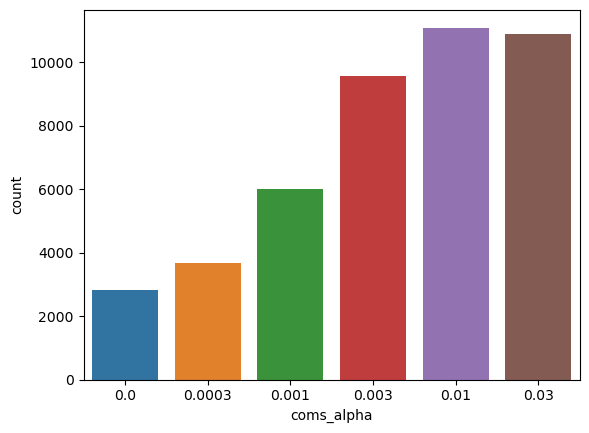

K562


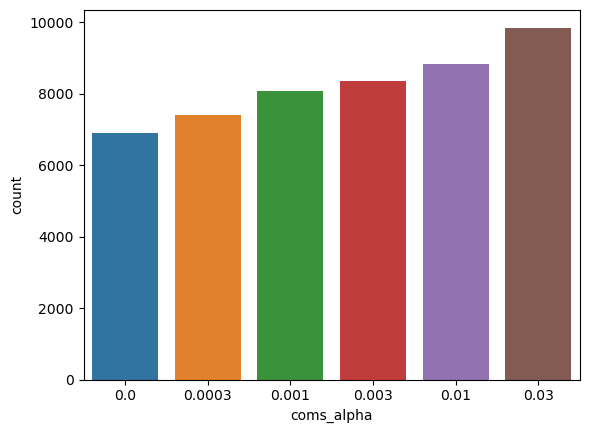

THP1


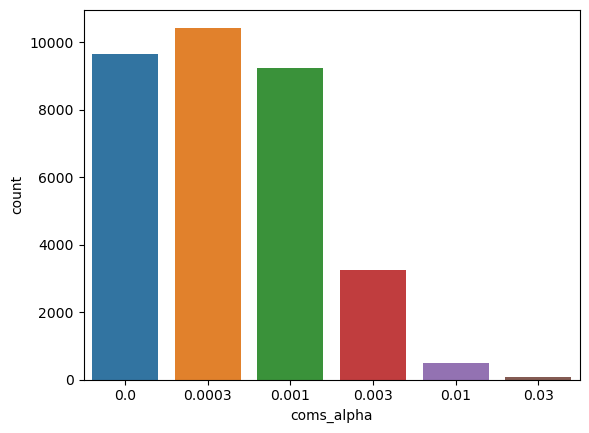

In [15]:
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    print(cell1)
    sns.countplot(data=coms_df[coms_df["designed_for"] == cell1], x="coms_alpha")
    plt.show()

In [16]:
final_df = pd.concat([coms_df, 
                      dens_df, 
                      sequences_generated_using_DE_motifs_df,
                      dataset_df,
                      sequences_from_batch_1_expression_spectrum_df]).reset_index(drop=True)
final_df.to_parquet(os.path.join(ensemble_predictions_dir, "filtered_ensemble_4_predictions_DENs_v14.parquet"))
final_df

design_method designed_for  \
0                             COMs         THP1   
1                             COMs         THP1   
2                             COMs         THP1   
3                             COMs         THP1   
4                             COMs         THP1   
...                            ...          ...   
210638  batchI_expression_spectrum         None   
210639  batchI_expression_spectrum         None   
210640  batchI_expression_spectrum         None   
210641  batchI_expression_spectrum         None   
210642  batchI_expression_spectrum         None   

                                        original_sequence  \
0       GTGACGGGGCTCCACTGTGTCGGGGACACCTACCCCAGCAACGACC...   
1       TTGCTGAGGACACCCAGAAGAATGTGATCTCCGCGCGGGTGCCTGA...   
2       ACAGCATCACTACACTTAAAAATTTCCCTCCTCACCCCCAGATTCC...   
3       GCATTGGCCAGATATGTCGTCACTCACAAAACTTCGAGCTCATTGG...   
4       TGCCTGGCATACAGTAGGTAATTAATGGAGTATTTGATGAGCGCAT...   
...                                                   ...   
210638                                               None   
210639                                               None   
210640                                               None   
210641                                               None   
210642                                               None   

                                                 sequence provenance  \
0       CCGCCCGTCCGCCGCGCCGGCCGCCGGGCGCCTTCCAAGAACTACC...       None   
1       ACCTCCAGGGTTTGAGGGGAAATTGTCTCTCCGCGCTGCCCTCCGC...       None   
2       GAAGCCGCGCGACGAAACGCCAGTCTCTTCCGCCTTCGTAGAAGCC...       None   
3       GCTCGAGGCAGTGCTCTCGTCGGCTGCAGAAACGGAAGCTGAGCCA...       None   
4       TTCCTGGAACAGAGCAGCAGTGCCGTGGAGAGGACGAAGGGATCAA...       None   
...                                                   ...        ...   
210638  AGCTTTATAGGAATGCTGTTGCTTTAAATCCGAAATCCCGTGCCGG...       None   
210639  AAACTCAGCGTGGGGTGGTGGGTTTCCCCGTCTTCTGGGAGACCCG...       None   
210640  GCGCGGGGCCAATCAGCGTGCGCCGTTCCGAAAGTTGCCTTTTATG...       None   
210641  GTGCGTCGGCTTCCGTACAACACGGATACTCTCTCTCTGACGCAAC...       None   
210642  GCAAGTGGGCAGTGAGTGTGCCACGGACTGGCCTGGGCTGTGGCCT...       None   

        coms_alpha diversity_loss_coef entropy_loss_coef  \
0           0.0010                None              None   
1           0.0030                None              None   
2           0.0100                None              None   
3           0.0030                None              None   
4           0.0003                None              None   
...            ...                 ...               ...   
210638         NaN                None              None   
210639         NaN                None              None   
210640         NaN                None              None   
210641         NaN                None              None   
210642         NaN                None              None   

       base_entropy_loss_coef  Jurkat_ensemble_mean  ...  K562_measured  \
0                        None              3.960525  ...           None   
1                        None              4.084723  ...           None   
2                        None              3.103304  ...           None   
3                        None              2.477976  ...           None   
4                        None              3.897619  ...           None   
...                       ...                   ...  ...            ...   
210638                   None              4.252730  ...       5.882017   
210639                   None             -0.360493  ...       5.780755   
210640                   None              2.427932  ...        5.68394   
210641                   None              3.830371  ...       4.775424   
210642                   None             -0.504501  ...        6.17558   

        THP1_ensemble_mean THP1_ensemble_std  THP1_design_model  \
0                 3.961377          0.568612           3.465319   
1                 4.085656          0.597134          

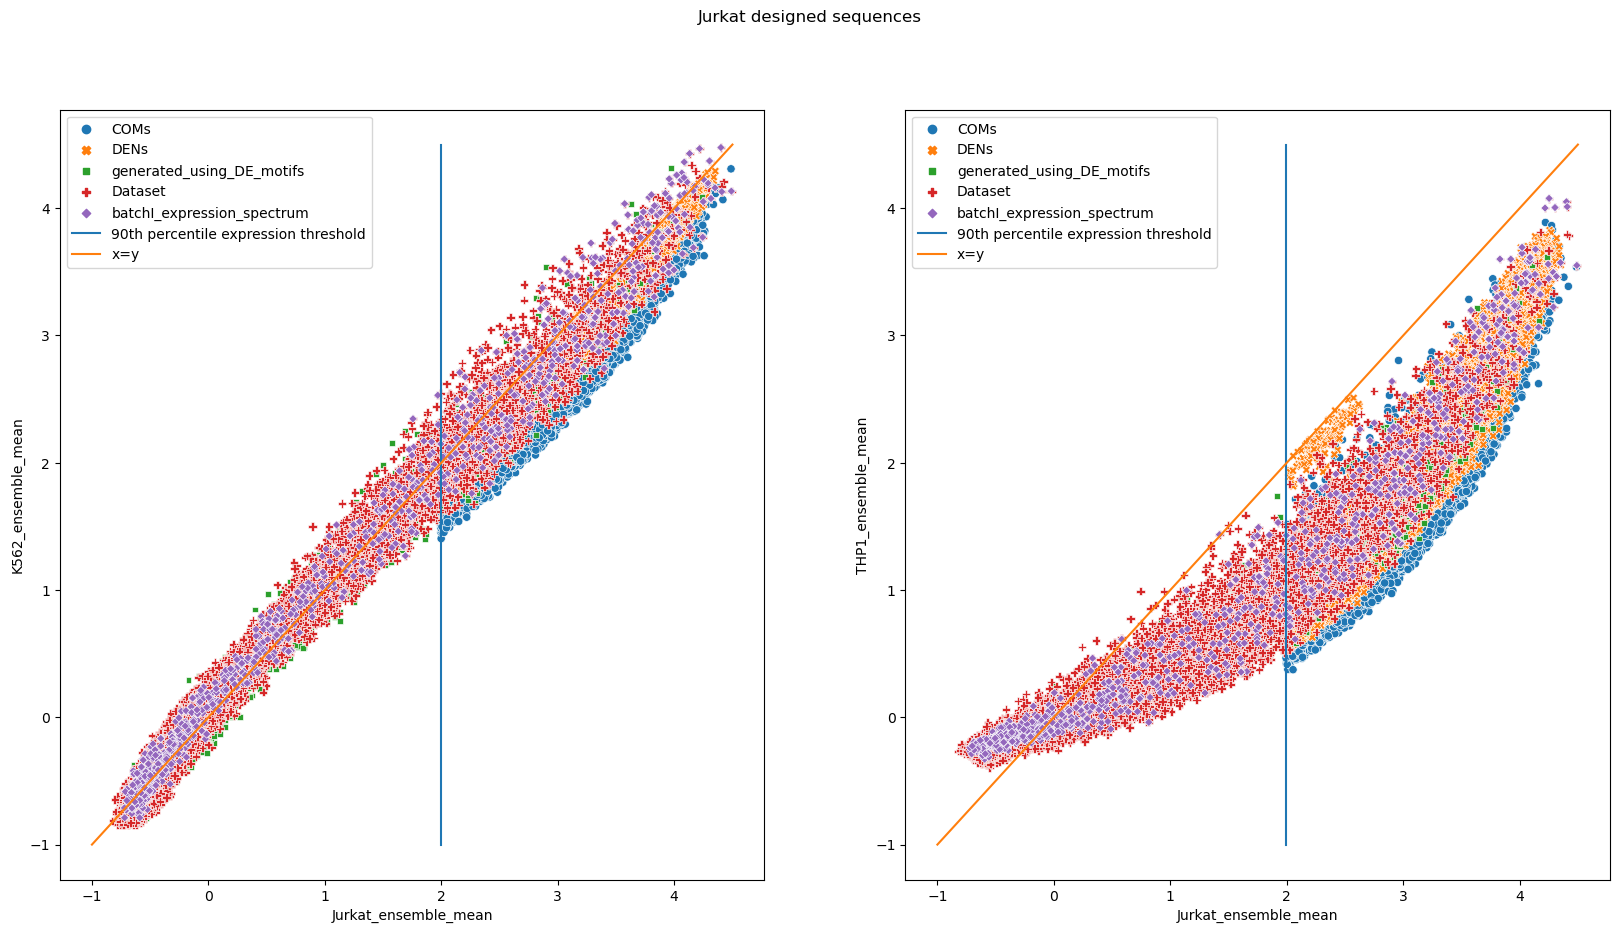

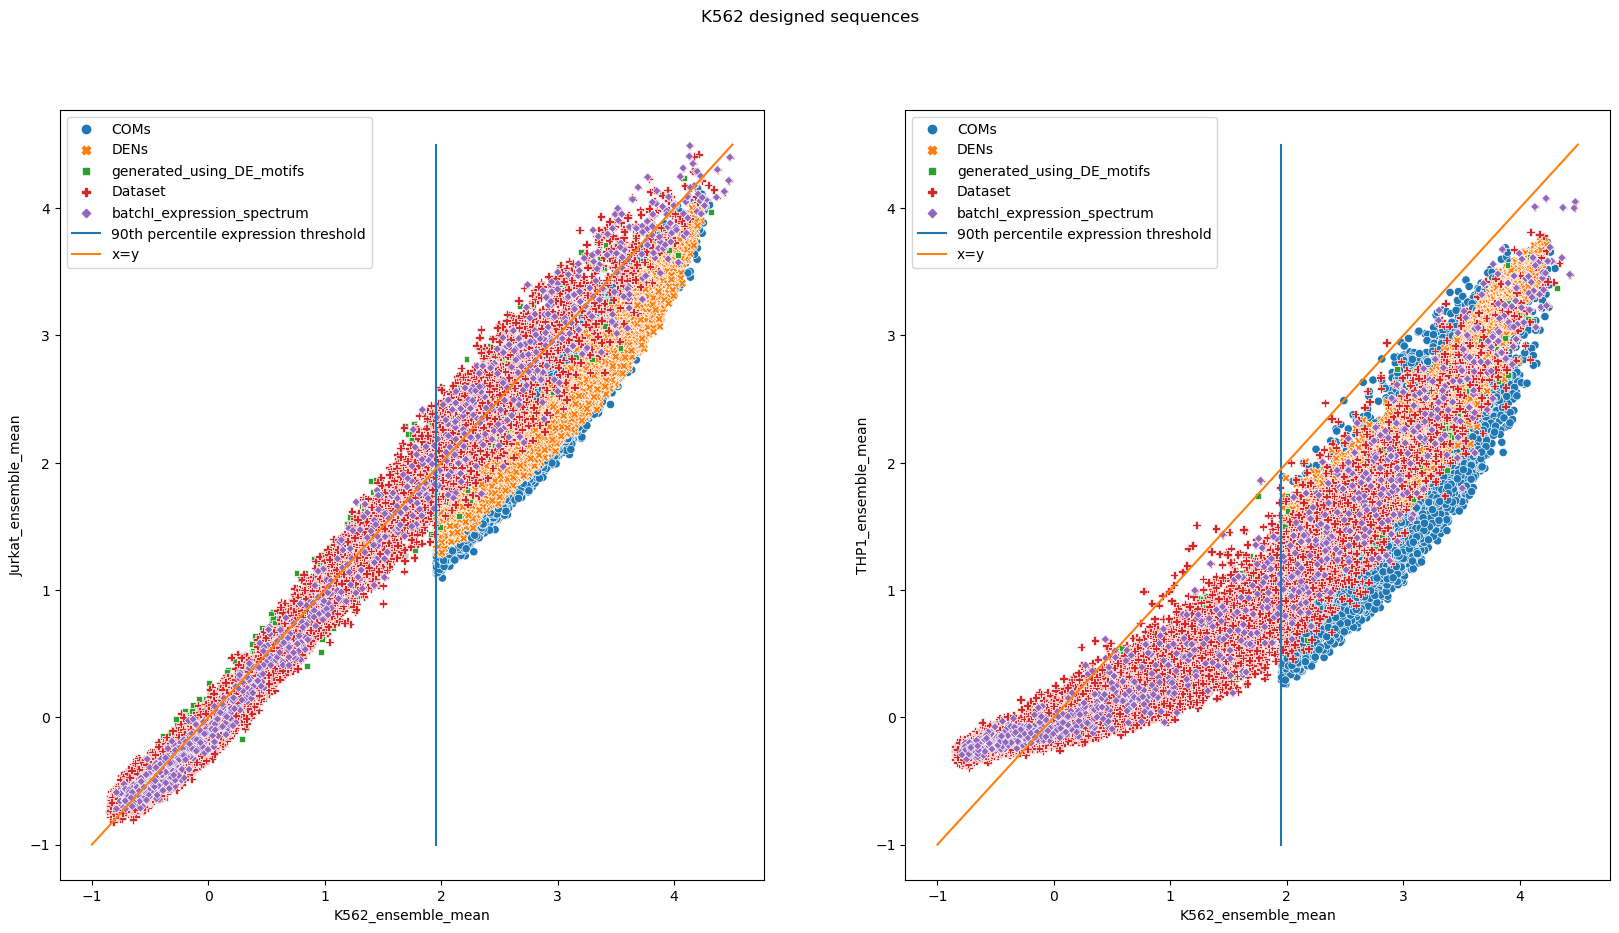

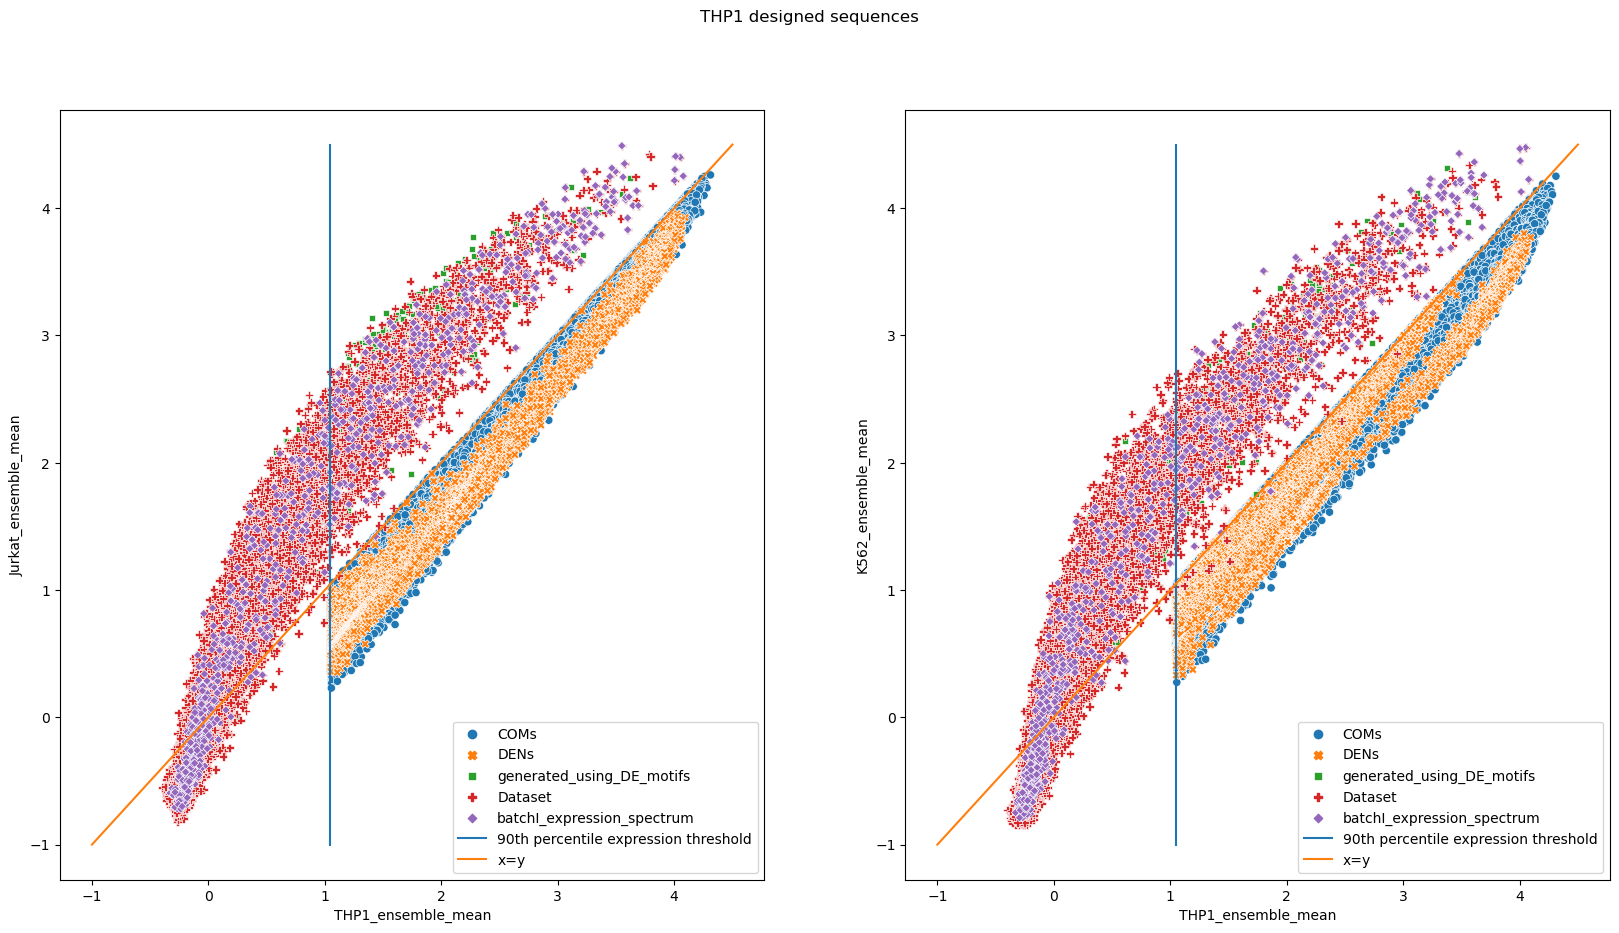

In [17]:
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    expression_percentile_thres_val = np.percentile(dataset_df[f"{cell1}_ensemble_mean"], expression_percentile_thres)
    
    subset_df = final_df[(final_df["designed_for"] == cell1) | (np.array(final_df["designed_for"]) == None)]
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    c = 0
    for j, cell2 in enumerate(["Jurkat", "K562", "THP1"]):
        if i == j:
            continue
        
        sns.scatterplot(data=subset_df, 
                        x=f"{cell1}_ensemble_mean", 
                        y=f"{cell2}_ensemble_mean", 
                        hue="design_method", style="design_method",
                        hue_order=["COMs", 
                                   "DENs", 
                                   "generated_using_DE_motifs", 
                                   "Dataset",
                                   "batchI_expression_spectrum"],
                        ax=ax[c])
        ax[c].plot(np.zeros(5) + expression_percentile_thres_val, np.linspace(-1, 4.5, 5), 
                   label=f"{expression_percentile_thres}th percentile expression threshold")
        ax[c].plot(np.linspace(-1, 4.5), np.linspace(-1, 4.5), label="x=y")
        ax[c].legend()
        c += 1
        
    fig.suptitle(f"{cell1} designed sequences")
    plt.show()

In [18]:
coms_df[["designed_for", "sequence", "Jurkat_ensemble_mean", "K562_ensemble_mean", "THP1_ensemble_mean", "diff_exp"]].sort_values(by="diff_exp", ascending=False)

designed_for                                           sequence  \
126602         K562  AAGAGGGCCCGCCGCCCAGCGGCACTCAGCTGATAGGTCCAAATGG...   
126601         K562  ATTCAGGTCCAACGTTTAAAAAAAAAAAATCAACCAATCAAACCAC...   
126600         K562  GTTCAGACGGCCGGCCAACGATTGATAGCATCAGTGCCCAAAGTCC...   
126599         K562  ACGCTAAGCATCCAAAGGCCAGTAGCTAACATCCCTCAGCTAATAA...   
126598         K562  TATACTTGGAGGCCAAGCCACTCTAACCTCGGCACCCTCCAGTAAA...   
...             ...                                                ...   
4              THP1  TTCCTGGAACAGAGCAGCAGTGCCGTGGAGAGGACGAAGGGATCAA...   
3              THP1  GCTCGAGGCAGTGCTCTCGTCGGCTGCAGAAACGGAAGCTGAGCCA...   
2              THP1  GAAGCCGCGCGACGAAACGCCAGTCTCTTCCGCCTTCGTAGAAGCC...   
1              THP1  ACCTCCAGGGTTTGAGGGGAAATTGTCTCTCCGCGCTGCCCTCCGC...   
0              THP1  CCGCCCGTCCGCCGCGCCGGCCGCCGGGCGCCTTCCAAGAACTACC...   

        Jurkat_ensemble_mean  K562_ensemble_mean  THP1_ensemble_mean  diff_exp  
126602              2.103949            2.913470            1.096087  1.313452  
126601              2.071550            2.939931            1.183631  1.312341  
126600              2.342810            3.122211            1.285997  1.307808  
126599              2.013448            2.889232            1.154022  1.305497  
126598              1.998005            2.950232            1.292194  1.305133  
...                      ...                 ...                 ...       ...  
4                   3.897619            3.896999            3.902343  0.005034  
3                   2.477976            2.483916            2.485921  0.004975  
2                   3.103304            3.093574            3.103351  0.004912  
1                   4.084723            4.078242            4.085656  0.004174  
0                   3.960525            3.959001            3.961377  0.001614  

[126603 rows x 6 columns]

In [19]:
dens_df[["designed_for", "sequence", "Jurkat_ensemble_mean", "K562_ensemble_mean", "THP1_ensemble_mean", "diff_exp"]].sort_values(by="diff_exp", ascending=False)

designed_for                                           sequence  \
64432         K562  GGGGCCCCCCCCATTGCAAATTCCAATCATGGAAACTTTCAACCTG...   
64431         K562  GCCATCCAAACCCATCCAATCGAACCAATCCAACCGAACCCATTTT...   
64430         K562  GGTTTAAACCAACCGAAACCAATCGAACCCAACCCACCGAAACCCC...   
64429         K562  GGCCCATTAACCAATGGAACCTCCCCTGGAAACCCACTCCAACCCT...   
64428         K562  GGCCCCAATCAATCCATCCATCGCAATCTTTTTTTTTTTTTTTTTT...   
...            ...                                                ...   
4             THP1  CCCCAAGCCAGGGGAAGCGGAAGCGGAAGCCAGGAAGCGGGAAGGC...   
3           Jurkat  CCGAAAACCGTTTCCTTTTTCTTTTCTCATCACAGGACATGATGCA...   
2             THP1  CGGGAAGGGACATGCTTCCTCTTCTTTCCTCCTCTTCCTTTCCTTC...   
1           Jurkat  CCGAAAACCGTTTGCTTTTTCTTTTCTCATCACACGACATGATGCA...   
0           Jurkat  CCGTAAACCGTTGCCTTTTTCTTTTCTCATCACCCGGCATGATGCA...   

       Jurkat_ensemble_mean  K562_ensemble_mean  THP1_ensemble_mean  diff_exp  
64432              2.827285            3.578091            2.148423  1.090237  
64431              2.381026            3.144034            1.752506  1.077268  
64430              2.759663            3.472431            2.052428  1.066386  
64429              2.374218            3.124044            1.746035  1.063918  
64428              2.331007            3.207339            1.960382  1.061644  
...                     ...                 ...                 ...       ...  
4                  1.914481            1.898708            1.919664  0.013070  
3                  2.160645            2.159127            2.137842  0.012161  
2                  1.684565            1.705325            1.706675  0.011730  
1                  2.415247            2.413458            2.410099  0.003469  
0                  2.057052            2.055234            2.052304  0.003283  

[64433 rows x 6 columns]